# Box, Box 2: A Logistic Regresion Application
## Importing libraries and data

In [1]:
# import necessary libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import seaborn as sns

# Read the DataFrame from the CSV file
my_data2 = pd.read_csv('../data/pitstops_modified.csv')
my_data2.head()

,raceId,year,driverId,number_of_stops,pit_delta,race_time
0,978,2017,822,1,0.464300,81.691550
1,981,2017,822,1,0.395467,75.613050
2,981,2017,815,1,0.422950,76.793133
3,981,2017,1,1,0.395417,75.538533
4,981,2017,20,1,0.405117,76.143817


## Binary Outcomes
### Data Visualization

In [2]:
# Let us first consider just two categories (2 and 3 pitstops)
my_data3 = my_data2.loc[(my_data2['number_of_stops'] == 2) | (my_data2['number_of_stops'] == 3)]

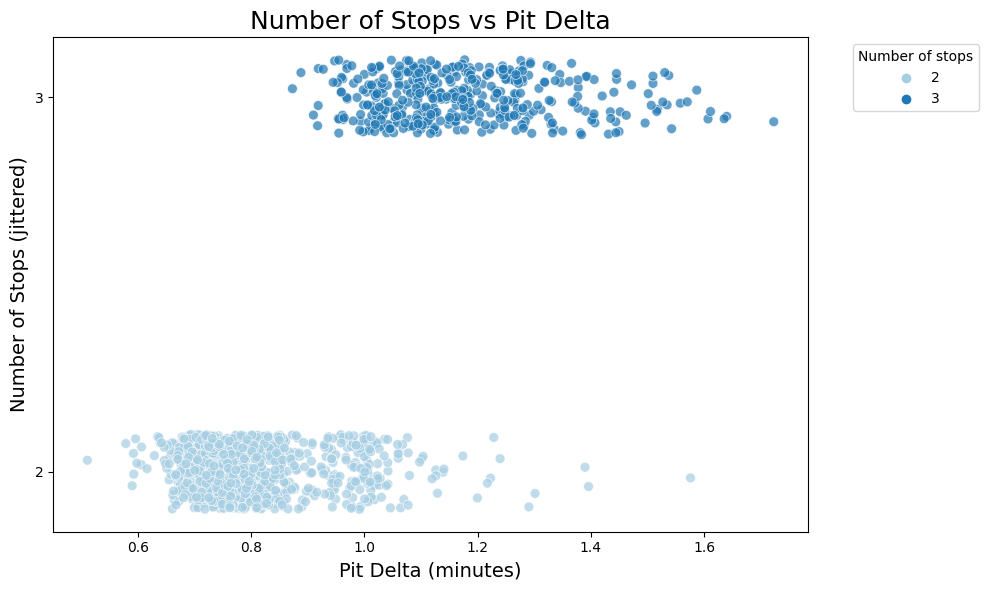

In [3]:
# Add jitter to 'number_of_stops' for visualization
jitter = 0.1
my_data3 = my_data3.copy()
my_data3['jitter_stops'] = my_data3['number_of_stops'].astype(float) + np.random.uniform(-jitter, jitter, size=len(my_data3))

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=my_data3, x='pit_delta', y='jitter_stops', 
                hue='number_of_stops', palette='Paired', alpha=0.7, s=50)


plt.title('Number of Stops vs Pit Delta', fontsize = 18)
plt.xlabel('Pit Delta (minutes)', fontsize = 14)
plt.ylabel('Number of Stops (jittered)', fontsize = 14)
plt.yticks([2, 3], ['2', '3'])
plt.legend(title='Number of stops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Fitting the Model

After mapping the number of pit stops to a binary outcome (0 for 2 stops, 1 for 3 stops), we perform a binary logistic regression. This model aims to predict the likelihood of a driver making a certain number of pit stops based on the pit delta time.

In [4]:
# Map pit stops to a binary outcome
my_data3.loc[my_data3['number_of_stops'] == 2, 'number_of_stops'] = 0
my_data3.loc[my_data3['number_of_stops'] == 3, 'number_of_stops'] = 1

# Perform binary logistic regression using statsmodels
pit_delta = sm.add_constant(my_data3['pit_delta'])  # adding a constant
stops = my_data3['number_of_stops']

model = sm.Logit(stops, pit_delta).fit()

Optimization terminated successfully.
         Current function value: 0.192909
         Iterations 9


### Visualizing the Logistic Regression Curve

After fitting the logistic regression model, we plot the scatter plot again along with the logistic regression curve. This visualization illustrates how pit delta time influences the probability of making 2 or 3 pit stops.

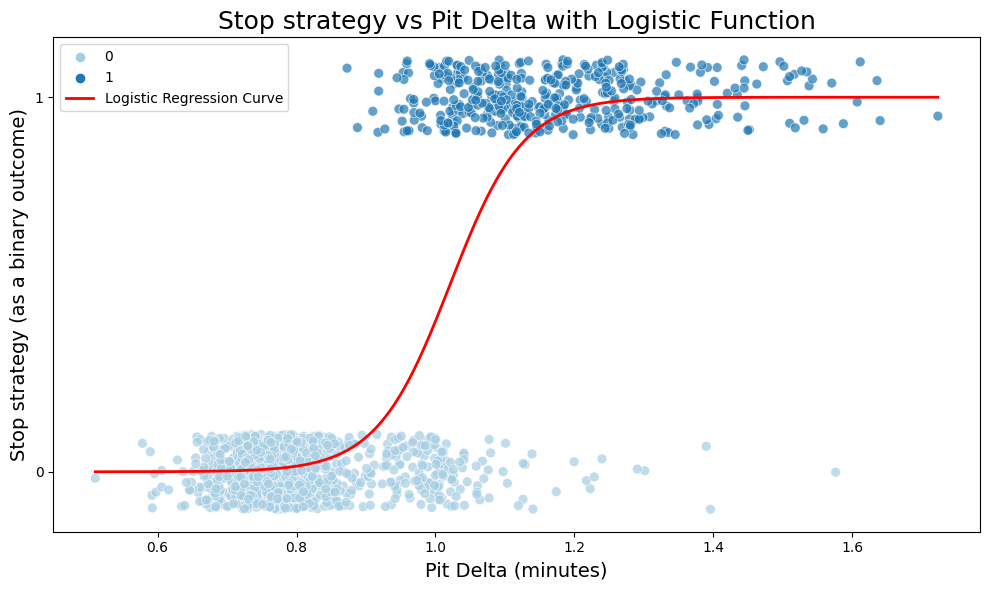

In [5]:
my_data3 = my_data3.copy()
my_data3['jitter_stops'] = my_data3['number_of_stops'].astype(float) + np.random.uniform(-jitter, jitter, size=len(my_data3))

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=my_data3, x='pit_delta', y='jitter_stops', 
                hue='number_of_stops', palette='Paired', 
                alpha=0.7, s=50)
plt.title('Stop strategy vs Pit Delta with Logistic Function', fontsize=18)
plt.xlabel('Pit Delta (minutes)', fontsize=14)
plt.ylabel('Stop strategy (as a binary outcome)', fontsize=14)

# Plotting the logistic function curve
# Generating a range of pit_delta values for predictions
pit_delta_values = np.linspace(my_data3['pit_delta'].min(), my_data3['pit_delta'].max(), 500)
pit_delta_values_const = sm.add_constant(pit_delta_values)  # adding a constant
stops_pred = model.predict(pit_delta_values_const)

plt.yticks([0, 1], ['0', '1'])
plt.plot(pit_delta_values, stops_pred, color='red', 
         label='Logistic Regression Curve', linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

### Interpreting Results Table

After fitting the logistic regression model, we examine the output summary to understand the model's coefficients, significance levels, and the overall fit of the model.

In [6]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:        number_of_stops   No. Observations:                 1444
Model:                          Logit   Df Residuals:                     1442
Method:                           MLE   Df Model:                            1
Date:                Sat, 30 Mar 2024   Pseudo R-squ.:                  0.6794
Time:                        22:20:34   Log-Likelihood:                -278.56
converged:                       True   LL-Null:                       -868.83
Covariance Type:            nonrobust   LLR p-value:                1.039e-258
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.3208      1.130    -17.100      0.000     -21.535     -17.106
pit_delta     18.9238      1.117     16.938      0.000      16.734      21.114


- **Dependent Variable**: The model aims to predict `number_of_stops`, with data from 1444 observations used in the analysis.
- **Model and Method**: The Logit model has been used, estimated via Maximum Likelihood Estimation (MLE), indicating a binary logistic regression approach.
- **Pseudo R-squared (0.6794)**: This value suggests a strong relationship between the predictor(s) and the outcome variable. It indicates that the model explains approximately 67.94% of the variance in the number of pit stops, which is a substantial proportion for a logistic regression model.
- **Log-Likelihood and LL-Null**: The log-likelihood of the model is -278.56, while the log-likelihood for the null model (a model with no predictors) is -868.83. The significant difference between these two values, reflected in the LLR p-value (1.039e-258), indicates that the predictor, `pit_delta`, significantly improves the model over the null model.
- **Coefficients**: 
  - The constant (intercept) coefficient is -19.3208, with a standard error of 1.130. The negative intercept suggests that, in the absence of pit delta adjustments, the log odds of taking more pit stops (moving from the base category) are low.
  - The coefficient for `pit_delta` is 18.9238, with a standard error of 1.117. This positive coefficient indicates that as the pit delta increases, so does the likelihood of taking more pit stops. The z-score of 16.938 for `pit_delta` and its associated p-value (P>|z|) effectively zero suggest that the effect of pit delta on the number of pit stops is highly significant.
- **Confidence Intervals**: For both the intercept and `pit_delta`, the 95% confidence intervals do not cross zero, reinforcing the significance of these coefficients.

The results demonstrate a strong and statistically significant relationship between pit delta and the number of pit stops a driver is likely to take during a race. The positive coefficient for `pit_delta` suggests that longer time spent in pits is associated with an increased likelihood of additional stops. The model's high pseudo R-squared value and the significant LLR p-value further attest to its effectiveness in capturing the relationship between pit delta and pit stop strategy.

## Categorical Outcomes

Extending the analysis, we explore models capable of handling more than two categorical outcomes for the number of pit stops. This involves fitting an ordinal logistic regression model and visualizing the predicted probabilities across different categories.

### Data Visualization

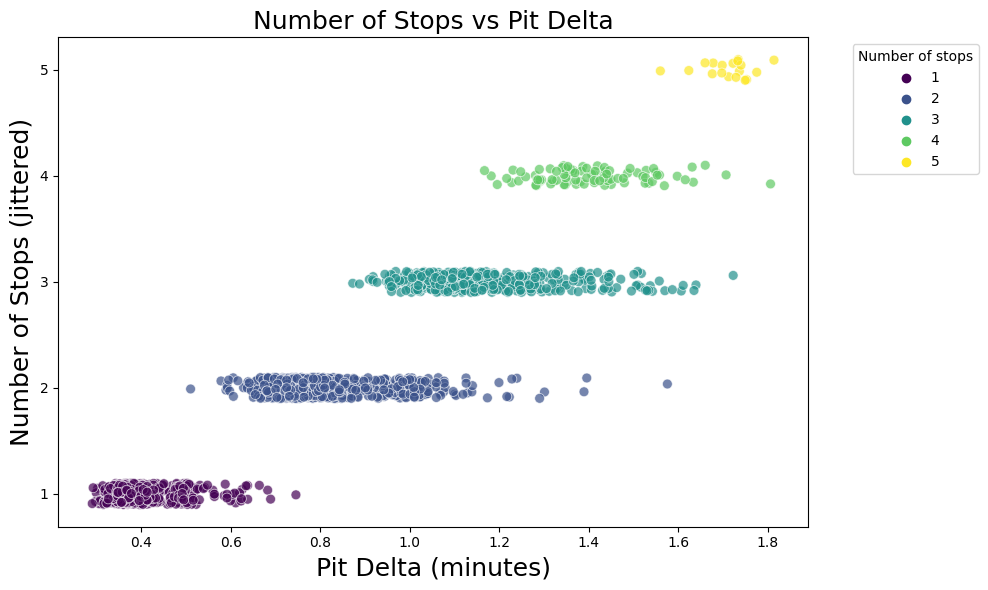

In [7]:
my_data2['jitter_stops'] = my_data2['number_of_stops'].astype(float) + np.random.uniform(-jitter, jitter, size=len(my_data2))

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=my_data2, x='pit_delta', y='jitter_stops', 
                hue='number_of_stops', palette='viridis', alpha=0.7, s=50)

plt.title('Number of Stops vs Pit Delta', fontsize = 18)
plt.xlabel('Pit Delta (minutes)', fontsize = 18)
plt.ylabel('Number of Stops (jittered)', fontsize = 18)
plt.legend(title='Number of stops', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Fitting the Model for Categorical Outcomes

Here, we fit an ordinal logistic regression model using the ordered categories of the number of pit stops. This model helps in understanding how the pit delta influences the likelihood of different pit stop strategies.

In [8]:
# importing library
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Making ordered categories
my_data2['number_of_stops'] = pd.Categorical(my_data2['number_of_stops'], ordered=True)

pit_delta_om = my_data2[['pit_delta']]  # Predictor variable
stops_om = my_data2['number_of_stops']  # Outcome variable

# fitting the ordinal logistic regression model
model = OrderedModel(stops_om, pit_delta_om, distr='logit')
result = model.fit(method='bfgs')  # Using the BFGS optimizer; you can choose others like 'powell'


Optimization terminated successfully.
         Current function value: 0.257720
         Iterations: 29
         Function evaluations: 30
         Gradient evaluations: 30


### Visualizing Predictions from the Ordinal Model

We generate and visualize predicted probabilities for different pit stop strategies based on the ordinal logistic regression model. This helps in illustrating the influence of pit delta on pit stop decisions.

In [9]:
# Generating predicted probabilities
pred_probs = result.predict(pit_delta_om) 

# Calculate the most likely number of stops for each observation
pred_stops = pred_probs.idxmax(axis=1) + 1

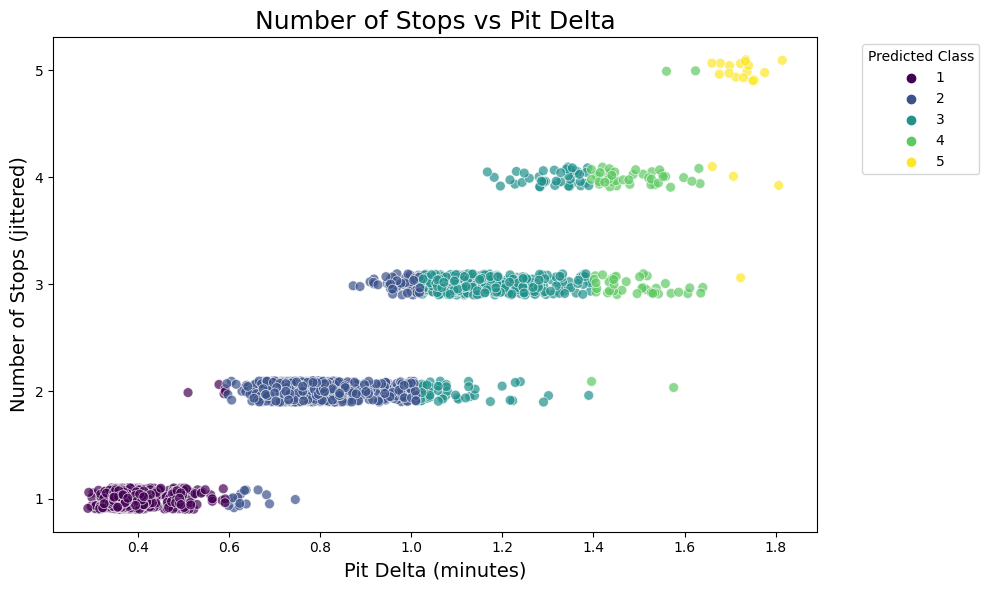

In [10]:
my_data2['predicted_stops'] = pred_stops 

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=my_data2, x='pit_delta', y='jitter_stops', 
                hue='predicted_stops', palette='viridis', alpha=0.7, s=50)

plt.title('Number of Stops vs Pit Delta', fontsize = 18)
plt.xlabel('Pit Delta (minutes)', fontsize = 14)
plt.ylabel('Number of Stops (jittered)', fontsize = 14)
plt.legend(title='Predicted Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

### Interpreting the Results from the Ordinal Model

The summary of the ordinal logistic regression model provides insights into the coefficients, their significance, and the overall model fit, offering a deeper understanding of the impact of pit delta on pit stop strategies.

In [11]:
# Displaying the summary of the model
print(result.summary())

                             OrderedModel Results                             
Dep. Variable:        number_of_stops   Log-Likelihood:                -604.61
Model:                   OrderedModel   AIC:                             1219.
Method:            Maximum Likelihood   BIC:                             1248.
Date:                Sat, 30 Mar 2024                                         
Time:                        22:20:37                                         
No. Observations:                2346                                         
Df Residuals:                    2341                                         
Df Model:                           1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
pit_delta     21.2874      0.737     28.899      0.000      19.844      22.731
1/2           12.6265      0.467     27.050      0.0

### Evaluating the Model with a Confusion Matrix

A confusion matrix is constructed to evaluate the accuracy of the ordinal logistic regression model in predicting the number of pit stops. This matrix compares the actual vs. predicted categories of pit stops.

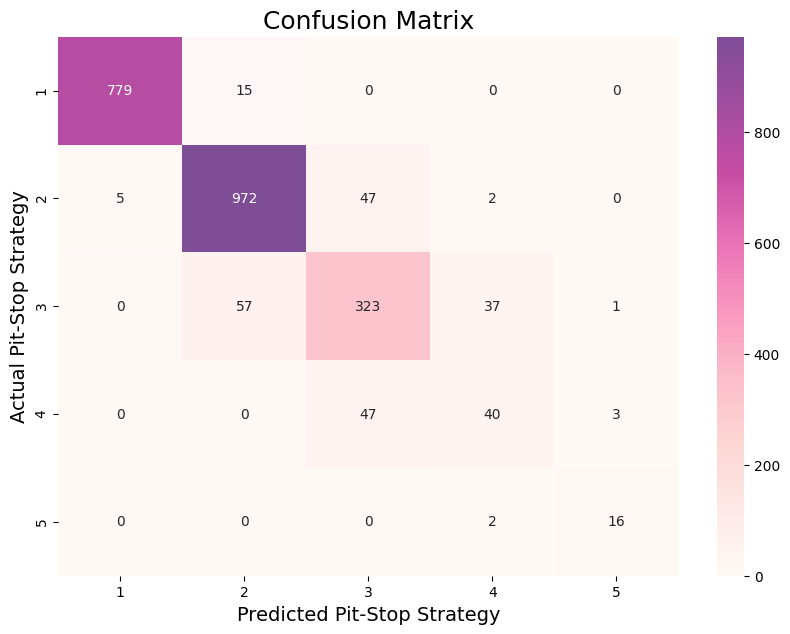

In [12]:
# import the confusion matrix
from sklearn.metrics import confusion_matrix 

labels = [1, 2, 3, 4, 5]  
actual = my_data2['number_of_stops']
predicted = my_data2['predicted_stops']
cm = confusion_matrix(actual, predicted, labels=labels)

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="RdPu", 
            xticklabels=labels, yticklabels=labels, alpha = 0.7)
plt.title('Confusion Matrix', fontsize = 18)
plt.ylabel('Actual Pit-Stop Strategy', fontsize = 14)
plt.xlabel('Predicted Pit-Stop Strategy', fontsize = 14)
plt.show()




### Other Evaluation Metrics

To further assess the performance of the ordinal logistic regression model, we calculate accuracy, precision, recall, F1-score, and support for each class of the number of pit stops.

In [13]:
from sklearn.metrics import accuracy_score, classification_report

actual = my_data2['number_of_stops']
actual_reset = actual.reset_index(drop=True)
pred_reset = pred_stops.reset_index(drop=True)

# Calculate accuracy
accuracy = accuracy_score(actual_reset, pred_reset)
print(f"Accuracy: {accuracy:.2f}")

# Calculate other metrics (precision, recall, F1-score, and support)
report = classification_report(actual_reset, pred_reset)
print(report)


Accuracy: 0.91
              precision    recall  f1-score   support

           1       0.99      0.98      0.99       794
           2       0.93      0.95      0.94      1026
           3       0.77      0.77      0.77       418
           4       0.49      0.44      0.47        90
           5       0.80      0.89      0.84        18

    accuracy                           0.91      2346
   macro avg       0.80      0.81      0.80      2346
weighted avg       0.91      0.91      0.91      2346

